#**RAGINI LASKAR**

**Stock Market Prediction using Numerical and Textual Analysis**


# Library Imports

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Loading and Working with the Dataset

In [2]:
# Dataframe for exploratory analysis
df=pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,79.297501,79.754997,79.000000,79.142502,78.214951,110843200
1,2020-01-22,79.644997,79.997498,79.327499,79.425003,78.494141,101832400
2,2020-01-23,79.480003,79.889999,78.912498,79.807503,78.872154,104472000
3,2020-01-24,80.062500,80.832497,79.379997,79.577499,78.644852,146537600
4,2020-01-27,77.514999,77.942497,76.220001,77.237503,76.332275,161940000


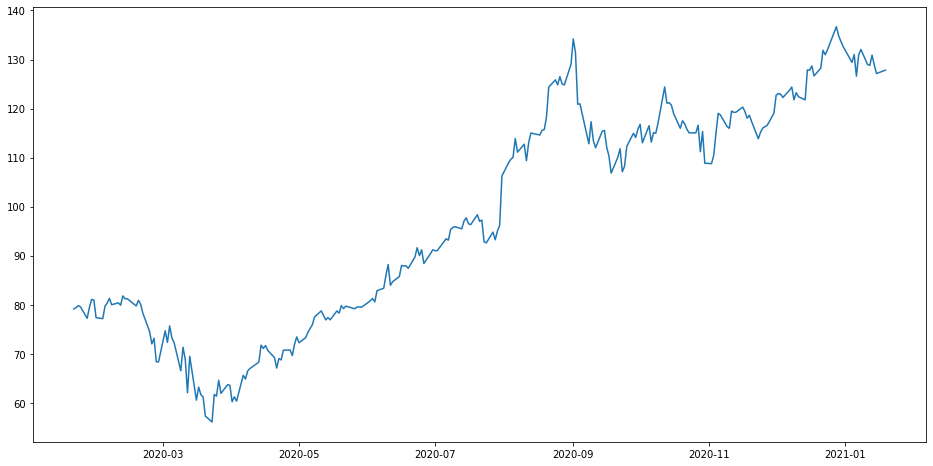

In [3]:

# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'])

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

# Creating a dataframe for storing the Closing stock data per day

In [5]:

# load the dataset
dataframe = pd.read_csv('/content/AAPL.csv', usecols=[5], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset)


[[ 78.21495 ]
 [ 78.49414 ]
 [ 78.872154]
 [ 78.64485 ]
 [ 76.332275]
 [ 78.49167 ]
 [ 80.134674]
 [ 80.018555]
 [ 76.470634]
 [ 76.26063 ]
 [ 78.77827 ]
 [ 79.42065 ]
 [ 80.34963 ]
 [ 79.25747 ]
 [ 79.6339  ]
 [ 79.15344 ]
 [ 81.033165]
 [ 80.456116]
 [ 80.47594 ]
 [ 79.00238 ]
 [ 80.146545]
 [ 79.32433 ]
 [ 77.52881 ]
 [ 73.84616 ]
 [ 71.34484 ]
 [ 72.47663 ]
 [ 67.73897 ]
 [ 67.69934 ]
 [ 74.0022  ]
 [ 71.65193 ]
 [ 74.97548 ]
 [ 72.543495]
 [ 71.580124]
 [ 65.91869 ]
 [ 70.66627 ]
 [ 68.21199 ]
 [ 61.47574 ]
 [ 68.841034]
 [ 59.984844]
 [ 62.622387]
 [ 61.089394]
 [ 60.62132 ]
 [ 56.772747]
 [ 55.566658]
 [ 61.141407]
 [ 60.80459 ]
 [ 64.00431 ]
 [ 61.354385]
 [ 63.105312]
 [ 62.976532]
 [ 59.662895]
 [ 60.65847 ]
 [ 59.786724]
 [ 65.00236 ]
 [ 64.24949 ]
 [ 65.89393 ]
 [ 66.369415]
 [ 67.6721  ]
 [ 71.089745]
 [ 70.440895]
 [ 71.0006  ]
 [ 70.03722 ]
 [ 68.58347 ]
 [ 66.46354 ]
 [ 68.37792 ]
 [ 68.11292 ]
 [ 70.079315]
 [ 70.12885 ]
 [ 68.99212 ]
 [ 71.25816 ]
 [ 72.76144 ]
 [ 71.

#  Data Normalization and Division into Training and Test sets

In [6]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)


[[0.2806899 ]
 [0.28415   ]
 [0.28883493]
 [0.28601784]
 [0.25735712]
 [0.28411937]
 [0.30448186]
 [0.30304277]
 [0.2590719 ]
 [0.25646913]
 [0.28767133]
 [0.2956326 ]
 [0.30714595]
 [0.29361027]
 [0.2982756 ]
 [0.29232103]
 [0.31561726]
 [0.3084656 ]
 [0.3087113 ]
 [0.29044884]
 [0.30462897]
 [0.29443896]
 [0.27218628]
 [0.22654563]
 [0.19554573]
 [0.2095725 ]
 [0.15085661]
 [0.15036547]
 [0.22847944]
 [0.19935161]
 [0.24054176]
 [0.21040118]
 [0.19846171]
 [0.12829715]
 [0.18713588]
 [0.15671897]
 [0.07323372]
 [0.16451496]
 [0.05475646]
 [0.08744466]
 [0.06844562]
 [0.06264454]
 [0.01494759]
 [0.        ]
 [0.06909025]
 [0.0649159 ]
 [0.1045714 ]
 [0.07172978]
 [0.09342974]
 [0.09183371]
 [0.05076641]
 [0.06310499]
 [0.05230111]
 [0.11694062]
 [0.10761005]
 [0.12799025]
 [0.13388318]
 [0.15002787]
 [0.19238418]
 [0.18434274]
 [0.19127941]
 [0.17933977]
 [0.16132295]
 [0.1350497 ]
 [0.15877545]
 [0.15549117]
 [0.17986155]
 [0.18047547]
 [0.16638744]
 [0.19447148]
 [0.21310222]
 [0.19

In [7]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


168 84


In [8]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX[0:5])
print(trainY[0:5])

[[0.2806899 ]
 [0.28415   ]
 [0.28883493]
 [0.28601784]
 [0.25735712]]
[0.28415    0.28883493 0.28601784 0.25735712 0.28411937]


In [10]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Creating a LSTM for Numerical Analysis

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
166/166 - 18s - loss: 0.0886
Epoch 2/100
166/166 - 0s - loss: 0.0316
Epoch 3/100
166/166 - 0s - loss: 0.0214
Epoch 4/100
166/166 - 0s - loss: 0.0172
Epoch 5/100
166/166 - 0s - loss: 0.0130
Epoch 6/100
166/166 - 0s - loss: 0.0093
Epoch 7/100
166/166 - 0s - loss: 0.0062
Epoch 8/100
166/166 - 0s - loss: 0.0039
Epoch 9/100
166/166 - 0s - loss: 0.0024
Epoch 10/100
166/166 - 0s - loss: 0.0017
Epoch 11/100
166/166 - 0s - loss: 0.0013
Epoch 12/100
166/166 - 0s - loss: 0.0012
Epoch 13/100
166/166 - 0s - loss: 0.0011
Epoch 14/100
166/166 - 0s - loss: 0.0011
Epoch 15/100
166/166 - 0s - loss: 0.0011
Epoch 16/100
166/166 - 0s - loss: 0.0011
Epoch 17/100
166/166 - 0s - loss: 0.0011
Epoch 18/100
166/166 - 0s - loss: 0.0011
Epoch 19/100
166/166 - 0s - loss: 0.0011
Epoch 20/100
166/166 - 0s - loss: 0.0011
Epoch 21/100
166/166 - 0s - loss: 0.0011
Epoch 22/100
166/166 - 0s - loss: 0.0011
Epoch 23/100
166/166 - 0s - loss: 0.0011
Epoch 24/100
166/166 - 0s - loss: 0.0011
Epoch 25/100
166/166 - 0

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.93 RMSE
Test Score: 3.48 RMSE


# Making Predictions

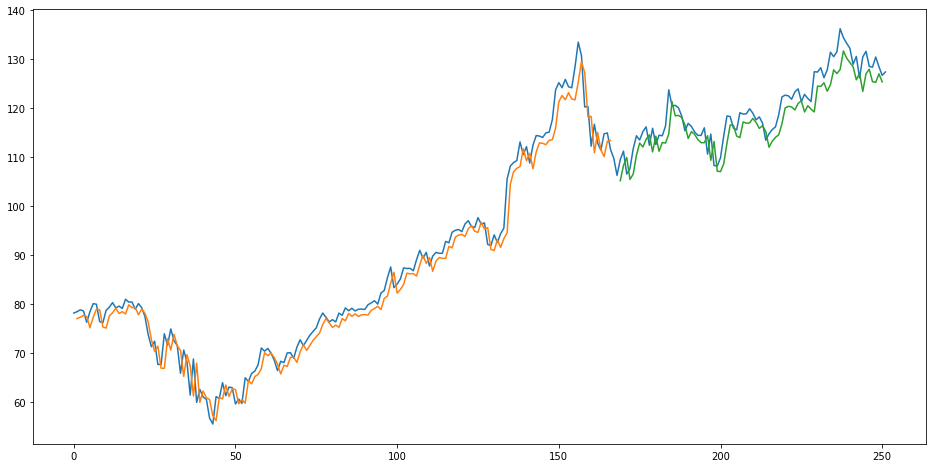

In [13]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()


#  Creating a Hybrid model for Numerical and textual Analysis


In [14]:
#Text Analysis

columns = ['Date','Category','News']
news3 = pd.read_csv('/content/india-news-headlines.csv', engine='python', names = columns, error_bad_lines=False)

news3

Skipping line 2348538: unexpected end of data


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
2348532,20160318,city.mysuru,Water crisis tops Karnataka Development Progra...
2348533,20160318,city.jaipur,Five new villages are getting connected with r...
2348534,20160318,city.jaipur,Sister saves her drowning brother
2348535,20160318,city.ahmedabad,Gujarat asks e-tailers to charge difference in...


In [15]:
news3.drop(0, inplace=True)
news3.drop('Category', axis = 1, inplace=True)
news3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348536 entries, 1 to 2348536
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 53.8+ MB


In [16]:
try:
  news3['Date'] = pd.to_datetime(news2['Date'],format= '%Y %m %d')
except:
  pass
news3

,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
2348532,20160318,Water crisis tops Karnataka Development Progra...
2348533,20160318,Five new villages are getting connected with r...
2348534,20160318,Sister saves her drowning brother
2348535,20160318,Gujarat asks e-tailers to charge difference in...


In [17]:
#Grouping the headlines for each day
news3['News'] = news3.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news3 = news3.drop_duplicates() 
news3.reset_index(inplace = True, drop = True)
news3

,Date,News
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010103,Powerless north India gropes in the dark Think...
2,20010104,The string that pulled Stephen Hawking to Indi...
3,20010105,Light combat craft takes India into club class...
4,20010106,Light combat craft takes India into club class...
...,...,...
5508,20160314,How to ease body aches and pain The right way ...
5509,20160315,Hollywood stars and their sexual preferences 5...
5510,20160316,What inspires Ranveer Singh's quirky fashion s...
5511,20160317,Celebrities who believe in aliens How could on...


In [19]:
news3['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
5508    How to ease body aches and pain The right way ...
5509    Hollywood stars and their sexual preferences 5...
5510    What inspires Ranveer Singh's quirky fashion s...
5511    Celebrities who believe in aliens How could on...
5512    Apps that all pet parents need to have Take a ...
Name: News, Length: 5513, dtype: object

#Adding subjectivity and polarity Scores


In [21]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

POLARITY - POSITIVE/NEGATIVE
SUBJECTIVITY - FACT/OPINION

In [22]:
#Adding subjectivity and polarity columns
news3['Subjectivity'] = news3['News'].apply(getSubjectivity)
news3['Polarity'] = news3['News'].apply(getPolarity)
news3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,News,Subjectivity,Polarity
0,20010102,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,20010103,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,20010104,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,20010105,Light combat craft takes India into club class...,0.476612,0.262024
4,20010106,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
5508,20160314,How to ease body aches and pain The right way ...,0.423928,0.077665
5509,20160315,Hollywood stars and their sexual preferences 5...,0.404816,0.051899
5510,20160316,What inspires Ranveer Singh's quirky fashion s...,0.414129,0.064769
5511,20160317,Celebrities who believe in aliens How could on...,0.402779,0.043667


# Visualizing the polarity and Subjectivity scores

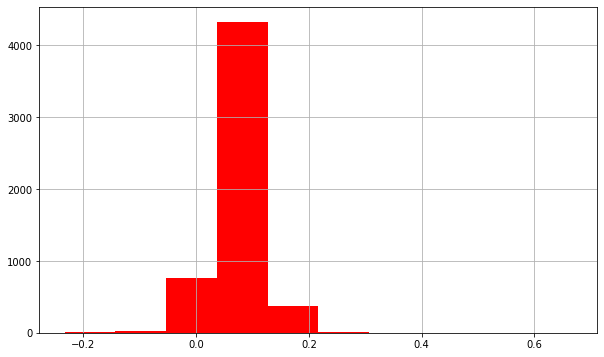

In [24]:
plt.figure(figsize = (10,6))
news3['Polarity'].hist(color = 'red')

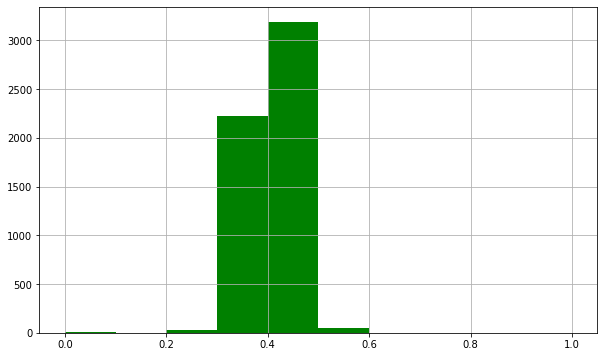

In [25]:
plt.figure(figsize = (10,6))
news3['Subjectivity'].hist(color = 'green')


# Performing Sentiment Analysis over the news Headlines

In [27]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

news3['Compound'] = [sia.polarity_scores(v)['compound'] for v in news3['News']]
news3['Negative'] = [sia.polarity_scores(v)['neg'] for v in news3['News']]
news3['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news3['News']]
news3['Positive'] = [sia.polarity_scores(v)['pos'] for v in news3['News']]
news3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,20010102,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,20010103,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,20010104,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,20010105,Light combat craft takes India into club class...,0.476612,0.262024,0.9633,0.124,0.722,0.154
4,20010106,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
5508,20160314,How to ease body aches and pain The right way ...,0.423928,0.077665,-0.9997,0.148,0.730,0.121
5509,20160315,Hollywood stars and their sexual preferences 5...,0.404816,0.051899,-0.9999,0.148,0.754,0.098
5510,20160316,What inspires Ranveer Singh's quirky fashion s...,0.414129,0.064769,-0.9998,0.143,0.752,0.106
5511,20160317,Celebrities who believe in aliens How could on...,0.402779,0.043667,-0.9998,0.120,0.803,0.077


# Merging the numerical and textual data

In [28]:
merge = news3
merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,20010102,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,20010103,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,20010104,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,20010105,Light combat craft takes India into club class...,0.476612,0.262024,0.9633,0.124,0.722,0.154
4,20010106,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
5508,20160314,How to ease body aches and pain The right way ...,0.423928,0.077665,-0.9997,0.148,0.730,0.121
5509,20160315,Hollywood stars and their sexual preferences 5...,0.404816,0.051899,-0.9999,0.148,0.754,0.098
5510,20160316,What inspires Ranveer Singh's quirky fashion s...,0.414129,0.064769,-0.9998,0.143,0.752,0.106
5511,20160317,Celebrities who believe in aliens How could on...,0.402779,0.043667,-0.9998,0.120,0.803,0.077


In [29]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,0.476612,0.262024,0.9633,0.124,0.722,0.154
4,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...
5508,0.423928,0.077665,-0.9997,0.148,0.730,0.121
5509,0.404816,0.051899,-0.9999,0.148,0.754,0.098
5510,0.414129,0.064769,-0.9998,0.143,0.752,0.106
5511,0.402779,0.043667,-0.9998,0.120,0.803,0.077


In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.427407,0.00945,0.274775,0.807,0.116776
1,0.407692,0.357550,0.36800,0.274775,0.766,0.182566
2,0.446847,0.356994,0.93690,0.225225,0.797,0.169408
3,0.476612,0.550397,0.98165,0.279279,0.722,0.253289
4,0.439394,0.535354,0.28925,0.342342,0.704,0.235197


In [37]:
X = new_df[0:252]
y =df['Close']

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape


(201, 6)

In [39]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
162,0.388796,0.279011,0.00070,0.315315,0.785,0.123355
159,0.334261,0.358519,0.00050,0.430180,0.734,0.123355
76,0.440657,0.470960,0.90285,0.150901,0.826,0.175987
59,0.493362,0.476381,0.08270,0.376126,0.705,0.210526
176,0.368197,0.310508,0.00045,0.328829,0.762,0.151316
229,0.383692,0.296192,0.00040,0.333333,0.760,0.152961
18,0.410714,0.361523,0.12245,0.297297,0.744,0.203947
221,0.401931,0.336948,0.00210,0.281532,0.781,0.154605
15,0.292222,0.437830,0.92240,0.299550,0.714,0.251645
152,0.379089,0.324312,0.00375,0.337838,0.736,0.187500


#  Training a Random Forest Regressor and Adaboost Regressor for hybrid analysis

In [40]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [41]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

[119.16032436  88.45967516 114.49324886  84.24667631 110.44242514
 122.96152434  91.51925004 117.8748501   78.02674947 123.40869854]
158    120.879997
83      78.285004
170    111.809998
101     85.747498
150    125.857498
199    108.769997
118     95.752502
227    122.410004
63      67.092499
135    108.937500
Name: Close, dtype: float64
Root mean square error =  16.714857260829913  RMSE


In [42]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [43]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  15.236885062145813  RMSE
